# Polynomial Regression

Polynomial Regression is a technique that is used for a nonlinear equation byt taking polynomial functions of indepedent variable.      

Transform the data to polynomail. Polynomial regression is for special case of the general linear regression model. It is useful for describing curvilinear relationships. Curvilinear relationships have by squaring or setting higher-order terms of the predictor variables.

Quadratic - 2nd order       
Cubic - 3rd order       
Higher order

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset.shape

(1172, 6)

In [4]:
X = dataset.iloc[ : , 0:4].values
Y = dataset.iloc[ : ,  4].values

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [7]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)

In [8]:
# Linear Model
lg = LinearRegression()

# Fit
lg.fit(X_, Y)

# Obtain coefficients
lg.coef_

array([  1.62688481e-11,   1.85764964e-12,  -7.80250018e-13,
        -2.69424404e-12,   1.00000000e+00,   4.47052037e-13,
        -3.82903837e-13,  -1.39216066e-12,   8.17674568e-13,
        -1.14370455e-14,   9.75399638e-13,  -4.82328634e-13,
         1.05600607e-12,  -1.60400107e-12,   5.87707676e-13,
        -2.83039766e-15,   5.99757042e-15,   4.41002252e-15,
         9.47274379e-15,  -1.28813313e-14,  -6.05981083e-15,
        -8.43161846e-15,  -6.80891094e-15,   3.66193025e-15,
        -2.39515640e-16,   1.63940678e-14,   5.36875253e-15,
        -8.20614218e-15,   9.90135221e-15,  -9.00849027e-15,
        -1.60832457e-14,  -2.98519388e-15,  -1.14820952e-15,
         5.63225424e-15,   1.35999520e-14])

In [9]:
lg.intercept_

-1.5975665235146153e-11

In [10]:
lg.score(X_, Y)

1.0

In [11]:
# Predict
lg.predict(X_test_[[0]])

array([ 12.83])

In [12]:
X = dataset.iloc[:,0:1].values
Y = dataset.iloc[:,4].values

In [13]:
poly=PolynomialFeatures(degree=3)
poly_x=poly.fit_transform(X)

regressor=LinearRegression()
regressor.fit(poly_x,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

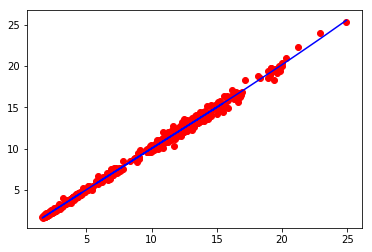

In [14]:
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(poly.fit_transform(X)),color='blue')
plt.show()

Calculate Polynomial of 3rd order using one independent variable

In [15]:
X = np.array(dataset['Open'].values)
Y = np.array(dataset['Adj Close'].values)

In [16]:
from scipy import *

f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p)

           3            2
0.0001808 x - 0.004963 x + 1.037 x - 0.06515


Polynomial of multiple independent variables

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [18]:
X = np.array(dataset[['Open', 'High', 'Low']].values)
Y = np.array(dataset['Adj Close'].values)

In [19]:
Y = Y.reshape(1172, -1)

In [20]:
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(Y)

Polynomial Regression with more than One Dimension

In [21]:
pr = PolynomialFeatures(degree=2)

In [22]:
X = np.array(dataset[['High', 'Low']].values)
Y = np.array(dataset['Adj Close'].values)

In [23]:
X_poly = pr.fit_transform(X)

In [24]:
# Pre-processing
from sklearn.preprocessing import StandardScaler

# Normalize the each feature simultaneously
SCALE =  StandardScaler()
SCALE.fit(X)

x_scale = SCALE.transform(X)

Example Polynomial

In [25]:
# Pipeline
from sklearn.pipeline import Pipeline

X = np.array(dataset['Open'].values)
Y = np.array(dataset['Adj Close'].values)
X = X.reshape(1172, -1)
Y = Y.reshape(1172, -1)

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X,Y)
yhat = pipe.predict(Y)
yhat[0:4]

array([[ 3.94746384],
       [ 3.99709476],
       [ 4.12615426],
       [ 4.17579988]])

Different Example Method

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

train_x = np.asanyarray(train[['Open']])
train_y = np.asanyarray(train[['Adj Close']])

test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Adj Close']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[   1.        ,    3.85      ,   14.8225    ],
       [   1.        ,    4.01      ,   16.0801    ],
       [   1.        ,    4.19      ,   17.5561    ],
       ..., 
       [   1.        ,   21.190001  ,  449.01614238],
       [   1.        ,   22.91      ,  524.8681    ],
       [   1.        ,   24.940001  ,  622.00364988]])

In [27]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.98085282  0.00110105]]
Intercept:  [ 0.05505099]


Text(0,0.5,'Adj Close')

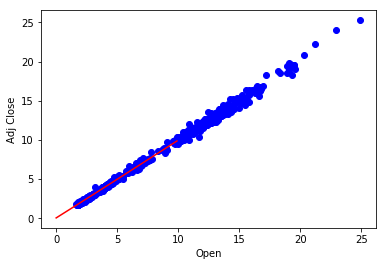

In [28]:
plt.scatter(train[['Open']], train[['Adj Close']],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Open")
plt.ylabel("Adj Close")

In [29]:
# Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.05
R2-score: 1.00
